In [1]:
# our commonly used functions
from global_bug_bot_functions import  *


# libraries for building convolutional neural network
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input, BatchNormalization
from tensorflow.keras.applications import MobileNetV2, Xception, DenseNet201
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l2

# libraries for tuning models
import keras_tuner as kt
from tensorflow.keras.optimizers import Adam
from keras_tuner import HyperParameters
from tensorflow.keras import backend as K
from keras.callbacks import History, EarlyStopping


# utility libraries
import os
import time
import itertools

# data set constants
TRAIN_GENERATOR = load_data(TRAIN_DIR)
VAL_GENERATOR = load_data(VALID_DIR)
TEST_GENERATOR = load_data(TEST_DIR, shuffle_flag=False)
EVAL_VAL_GENERATOR = load_data(VALID_DIR, shuffle_flag=False)

# best hps found from tuning
# from ep20_pat3_del0.001_ex1_maxtr20_from_tuning_script_final_tuned_models_results_xception.csv
# ---> tuned with max epoch = 20, patience = 3, minimum delta = 0.001, max trials = 20, l2 reg = 0.01
best_lr = 0.001
best_dropout = 0.2
best_batch_size	= 16
best_epochs	= 5
best_l2 = 0.01

base_model = Xception(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# freeze the base model layers
base_model.trainable = False

# global pooling and dropout layers included similar to jute pest architecture
x = tf.keras.layers.GlobalAveragePooling2D()(base_model.output)

# batch norm
x = BatchNormalization()(x)
x = Dropout(best_dropout)(x)



# final softmax probabilistic classification layer
output_layer = Dense(TRAIN_GENERATOR.num_classes, activation='softmax', kernel_regularizer=l2(best_l2))(x)
model = Model(inputs=base_model.input, outputs=output_layer)

optimizer = Adam(learning_rate=best_lr)

model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(TRAIN_GENERATOR,validation_data=VAL_GENERATOR, epochs = best_epochs, batch_size = best_batch_size)



/Users/shirleyfong/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


Found 6102 images belonging to 11 classes.
Found 440 images belonging to 11 classes.
Found 220 images belonging to 11 classes.
Found 440 images belonging to 11 classes.
Epoch 1/5


/Users/shirleyfong/Library/Python/3.9/lib/python/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


191/191 ━━━━━━━━━━━━━━━━━━━━ 123s 637ms/step - accuracy: 0.5479 - loss: 1.6667 - val_accuracy: 0.6523 - val_loss: 1.1573
Epoch 2/5
191/191 ━━━━━━━━━━━━━━━━━━━━ 114s 599ms/step - accuracy: 0.8297 - loss: 0.7133 - val_accuracy: 0.6795 - val_loss: 1.1325
Epoch 3/5
191/191 ━━━━━━━━━━━━━━━━━━━━ 115s 602ms/step - accuracy: 0.8938 - loss: 0.5248 - val_accuracy: 0.6932 - val_loss: 1.1154
Epoch 4/5
191/191 ━━━━━━━━━━━━━━━━━━━━ 117s 611ms/step - accuracy: 0.9144 - loss: 0.4634 - val_accuracy: 0.7000 - val_loss: 1.1520
Epoch 5/5
191/191 ━━━━━━━━━━━━━━━━━━━━ 117s 615ms/step - accuracy: 0.9267 - loss: 0.4271 - val_accuracy: 0.6955 - val_loss: 1.1566


# Validation plots

14/14 ━━━━━━━━━━━━━━━━━━━━ 9s 593ms/step
Classification Report:


,precision,recall,f1-score,support
adult_rice_weevil,0.707317,0.725000,0.716049,40.000000
american_house_spider,0.763158,0.725000,0.743590,40.000000
bedbug,0.568182,0.625000,0.595238,40.000000
brown_stink_bug,0.775000,0.775000,0.775000,40.000000
carpenter_ant,0.595745,0.700000,0.643678,40.000000
cellar_spider,0.852941,0.725000,0.783784,40.000000
flea,0.413793,0.600000,0.489796,40.000000
house_centipede,0.900000,0.900000,0.900000,40.000000
silverfish,0.756098,0.775000,0.765432,40.000000
subterranean_termite,0.750000,0.525000,0.617647,40.000000


<Figure size 800x600 with 0 Axes>

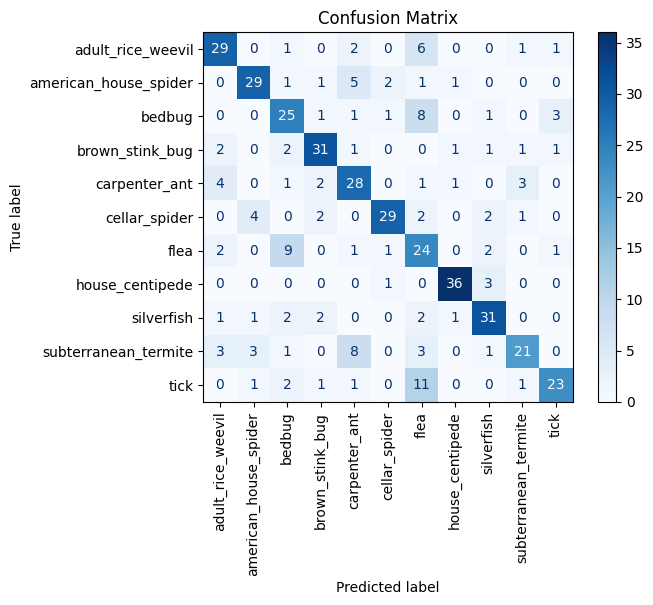

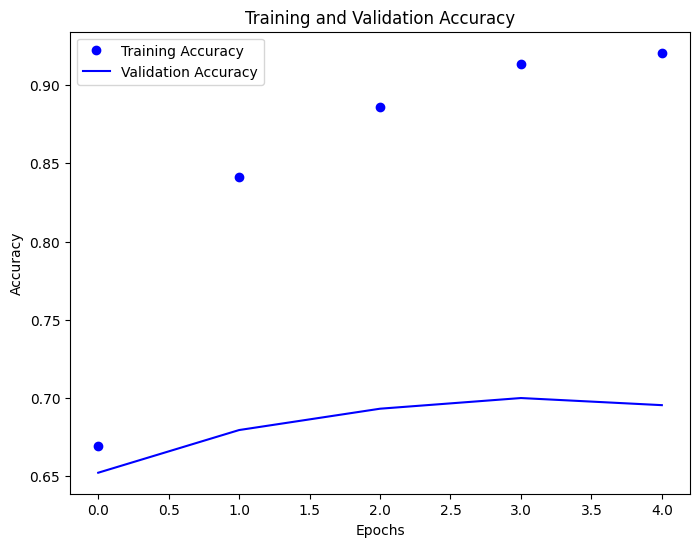

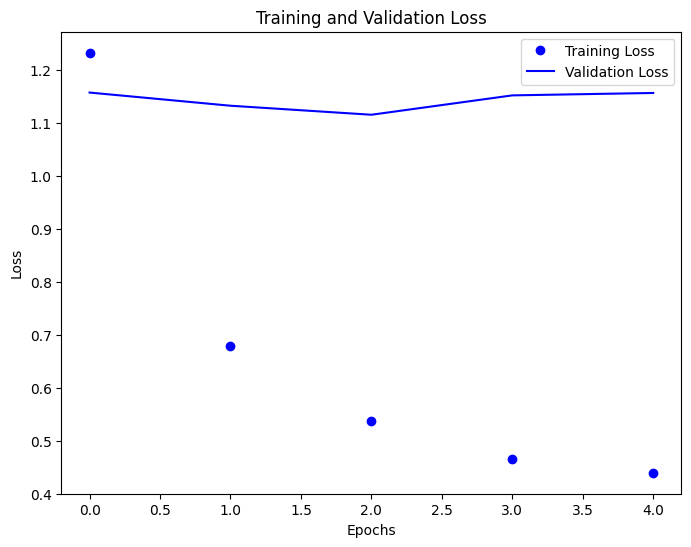

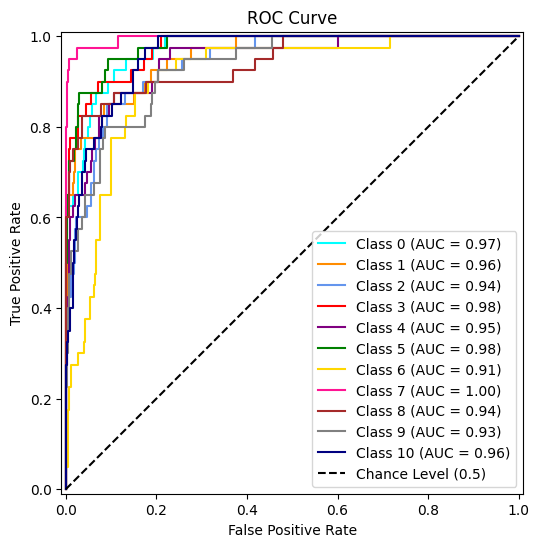

Macro-averaged One-vs-One ROC AUC score: 0.96
Accuracy: 0.695
Precision: 0.716
Recall: 0.695
F1 Score: 0.7


{'accuracy': 0.695,
 'precision': 0.716,
 'recall': 0.695,
 'f1_score': 0.7,
 'classification_report_df':                        precision    recall  f1-score     support
 adult_rice_weevil       0.707317  0.725000  0.716049   40.000000
 american_house_spider   0.763158  0.725000  0.743590   40.000000
 bedbug                  0.568182  0.625000  0.595238   40.000000
 brown_stink_bug         0.775000  0.775000  0.775000   40.000000
 carpenter_ant           0.595745  0.700000  0.643678   40.000000
 cellar_spider           0.852941  0.725000  0.783784   40.000000
 flea                    0.413793  0.600000  0.489796   40.000000
 house_centipede         0.900000  0.900000  0.900000   40.000000
 silverfish              0.756098  0.775000  0.765432   40.000000
 subterranean_termite    0.750000  0.525000  0.617647   40.000000
 tick                    0.793103  0.575000  0.666667   40.000000
 accuracy                0.695455  0.695455  0.695455    0.695455
 macro avg               0.715940  0.

In [2]:
%matplotlib inline
evaluation_metrics(model, EVAL_VAL_GENERATOR, history)


# Validation metrics for Xception: accuracy': 0.698,'precision': 0.715,'recall': 0.698,'f1_score': 0.7

# Test plots

/Users/shirleyfong/Library/Python/3.9/lib/python/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 540ms/step
Classification Report:


,precision,recall,f1-score,support
adult_rice_weevil,0.866667,0.650000,0.742857,20.000000
american_house_spider,0.809524,0.850000,0.829268,20.000000
bedbug,0.454545,0.500000,0.476190,20.000000
brown_stink_bug,0.833333,0.750000,0.789474,20.000000
carpenter_ant,0.560000,0.700000,0.622222,20.000000
cellar_spider,1.000000,0.850000,0.918919,20.000000
flea,0.344828,0.500000,0.408163,20.000000
house_centipede,0.857143,0.900000,0.878049,20.000000
silverfish,0.928571,0.650000,0.764706,20.000000
subterranean_termite,0.611111,0.550000,0.578947,20.000000


<Figure size 800x600 with 0 Axes>

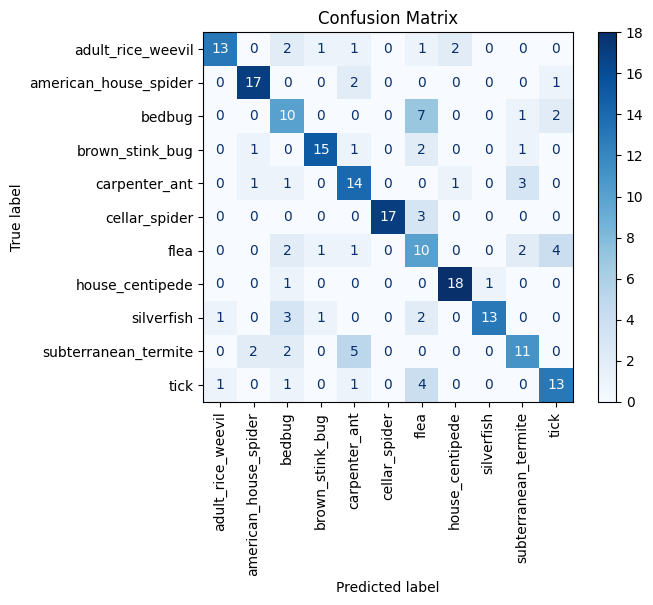

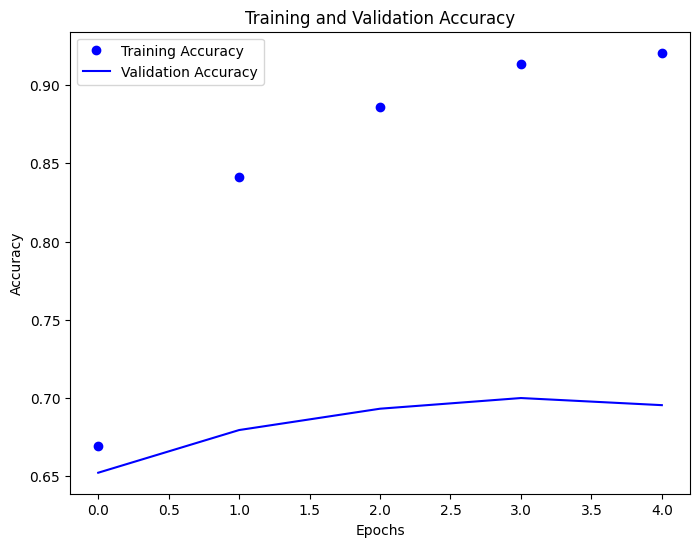

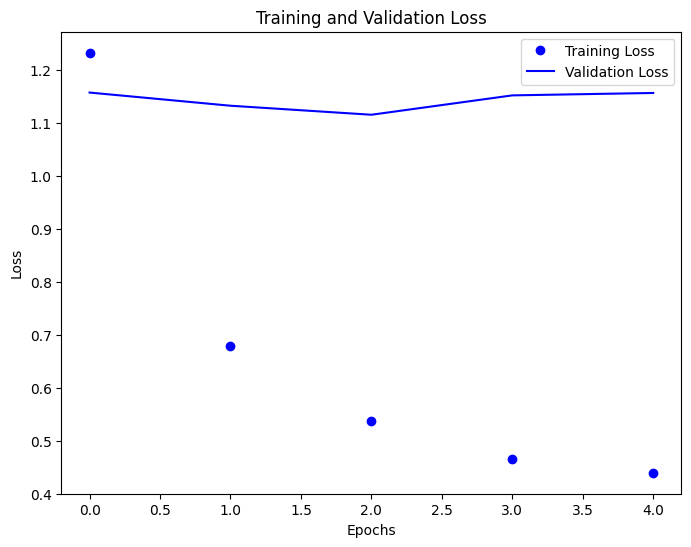

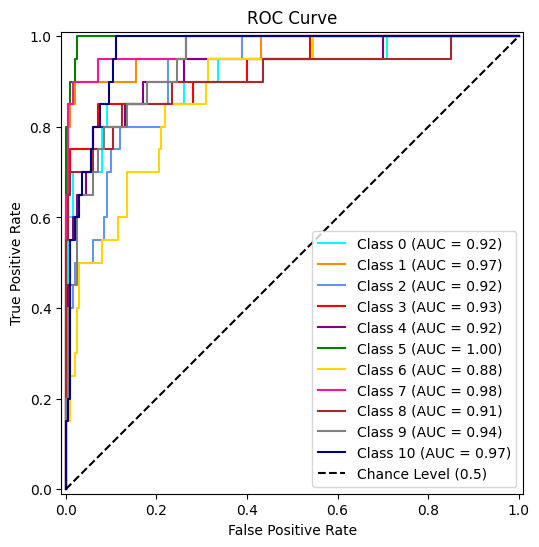

Macro-averaged One-vs-One ROC AUC score: 0.94
Accuracy: 0.686
Precision: 0.72
Recall: 0.686
F1 Score: 0.696


{'accuracy': 0.686,
 'precision': 0.72,
 'recall': 0.686,
 'f1_score': 0.696,
 'classification_report_df':                        precision    recall  f1-score     support
 adult_rice_weevil       0.866667  0.650000  0.742857   20.000000
 american_house_spider   0.809524  0.850000  0.829268   20.000000
 bedbug                  0.454545  0.500000  0.476190   20.000000
 brown_stink_bug         0.833333  0.750000  0.789474   20.000000
 carpenter_ant           0.560000  0.700000  0.622222   20.000000
 cellar_spider           1.000000  0.850000  0.918919   20.000000
 flea                    0.344828  0.500000  0.408163   20.000000
 house_centipede         0.857143  0.900000  0.878049   20.000000
 silverfish              0.928571  0.650000  0.764706   20.000000
 subterranean_termite    0.611111  0.550000  0.578947   20.000000
 tick                    0.650000  0.650000  0.650000   20.000000
 accuracy                0.686364  0.686364  0.686364    0.686364
 macro avg               0.719611  0

In [3]:
%matplotlib inline
evaluation_metrics(model, TEST_GENERATOR, history)


# Test metrics for Xception: 'accuracy': 0.682, 'precision': 0.709, 'recall': 0.682,'f1_score': 0.687